In [1]:
!pip install -q sklearn

In [92]:
%tensorflow_version 2.x 
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
#librerie necessarie
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

In [4]:
#per importare dataset dal proprio Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [82]:
# Import del dataset
dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/spam.csv', delimiter=";") # dataset completo
pd.DataFrame.head(dataset)

,pct_make,pct_address,pct_all,pct_3d,pct_our,pct_over,pct_remove,pct_internet,pct_order,pct_mail,...,pct_semicolon,pct_parenthesis,pct_bracket,pct_exclamatory,pct_dollar,pct_hash,crl_average,crl_longest,crl_total,spam
0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.793,0.0,0.000,0.000,0.0,1.250,2,5,0
1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.000,0.0,2.000,5,16,0
2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.436,0.000,0.0,3.071,13,43,0
3,0.0,0.0,0.91,0.0,0.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.000,0.0,1.505,14,128,0
4,0.1,0.0,0.10,0.0,0.4,0.1,0.1,0.0,0.2,0.2,...,0.0,0.093,0.0,0.297,0.156,0.0,6.800,494,1428,1


In [46]:
pd.DataFrame.describe(dataset)

,pct_make,pct_address,pct_all,pct_3d,pct_our,pct_over,pct_remove,pct_internet,pct_order,pct_mail,...,pct_semicolon,pct_parenthesis,pct_bracket,pct_exclamatory,pct_dollar,pct_hash,crl_average,crl_longest,crl_total,spam
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.104269,0.224921,0.280924,0.053364,0.311193,0.094351,0.109796,0.100875,0.088163,0.240003,...,0.041549,0.143448,0.016674,0.260041,0.073843,0.039329,5.331851,53.554076,283.285326,0.388587
std,0.304708,1.356355,0.509919,1.347712,0.666405,0.264646,0.376732,0.387389,0.271085,0.658965,...,0.263432,0.289106,0.114322,0.781192,0.253907,0.317007,34.626574,211.312017,626.510496,0.487495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.067000,0.000000,0.000000,0.000000,0.000000,2.250000,14.000000,94.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.189000,0.000000,0.310000,0.047250,0.000000,3.705000,43.000000,264.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,13.129000,1102.500000,9989.000000,15841.000000,1.000000


In [75]:
#alla prima interazione togliere il commento
#features = dataset.drop(columns="spam")
pd.DataFrame.describe(features)

,pct_make,pct_address,pct_all,pct_3d,pct_our,pct_over,pct_remove,pct_internet,pct_order,pct_mail,...,pct_conference,pct_semicolon,pct_parenthesis,pct_bracket,pct_exclamatory,pct_dollar,pct_hash,crl_average,crl_longest,crl_total
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.104269,0.224921,0.280924,0.053364,0.311193,0.094351,0.109796,0.100875,0.088163,0.240003,...,0.030144,0.041549,0.143448,0.016674,0.260041,0.073843,0.039329,5.331851,53.554076,283.285326
std,0.304708,1.356355,0.509919,1.347712,0.666405,0.264646,0.376732,0.387389,0.271085,0.658965,...,0.241560,0.263432,0.289106,0.114322,0.781192,0.253907,0.317007,34.626574,211.312017,626.510496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.067000,0.000000,0.000000,0.000000,0.000000,2.250000,14.000000,94.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.189000,0.000000,0.310000,0.047250,0.000000,3.705000,43.000000,264.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,8.330000,4.385000,9.752000,4.081000,32.478000,6.003000,13.129000,1102.500000,9989.000000,15841.000000


In [83]:
#divido in training e test
training_data = dataset.sample(frac=0.8, random_state=25)
testing_data = dataset.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 2944
No. of testing examples: 736


In [87]:
pd.DataFrame.describe(training_data)

,pct_make,pct_address,pct_all,pct_3d,pct_our,pct_over,pct_remove,pct_internet,pct_order,pct_mail,...,pct_conference,pct_semicolon,pct_parenthesis,pct_bracket,pct_exclamatory,pct_dollar,pct_hash,crl_average,crl_longest,crl_total
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,...,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,0.106576,0.228981,0.281926,0.036433,0.313920,0.090948,0.115788,0.101175,0.086240,0.243060,...,0.027514,0.042577,0.142708,0.015334,0.269417,0.070834,0.040231,5.546204,53.871603,276.811141
std,0.308756,1.361977,0.519588,1.014175,0.654844,0.259705,0.389468,0.394631,0.271973,0.649958,...,0.197667,0.261637,0.295553,0.097142,0.847334,0.223366,0.346785,36.655667,227.359696,585.521149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.586000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.067000,0.000000,0.000000,0.000000,0.000000,2.241000,14.000000,92.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.000000,0.189000,0.000000,0.306000,0.046000,0.000000,3.657500,42.000000,261.250000
max,4.540000,14.280000,5.100000,40.130000,8.330000,5.880000,7.270000,11.110000,5.260000,18.180000,...,3.700000,4.385000,9.752000,2.777000,32.478000,6.003000,13.129000,1102.500000,9989.000000,10062.000000


In [88]:
pd.DataFrame.describe(testing_data)

,pct_make,pct_address,pct_all,pct_3d,pct_our,pct_over,pct_remove,pct_internet,pct_order,pct_mail,...,pct_conference,pct_semicolon,pct_parenthesis,pct_bracket,pct_exclamatory,pct_dollar,pct_hash,crl_average,crl_longest,crl_total
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,...,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,0.095041,0.208682,0.276916,0.121087,0.300285,0.107962,0.085829,0.099674,0.095856,0.227772,...,0.040666,0.037437,0.146410,0.022035,0.222538,0.085882,0.035717,4.474437,52.283967,309.182065
std,0.287964,1.334421,0.469566,2.228761,0.711134,0.283329,0.319889,0.357206,0.267550,0.694148,...,0.368086,0.270635,0.261899,0.166128,0.421940,0.350342,0.146512,24.911192,128.546165,768.852596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.592000,6.000000,32.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.067000,0.000000,0.000000,0.000000,0.000000,2.291000,15.000000,104.000000
75%,0.000000,0.000000,0.420000,0.000000,0.320000,0.000000,0.000000,0.000000,0.000000,0.080000,...,0.000000,0.000000,0.186500,0.000000,0.329500,0.054000,0.000000,3.888750,46.000000,287.500000
max,4.340000,14.280000,3.570000,42.810000,10.000000,2.540000,5.400000,4.620000,2.480000,11.110000,...,8.330000,4.187000,4.271000,4.081000,3.588000,5.300000,2.290000,664.000000,1505.000000,15841.000000


In [85]:
y_train = training_data.pop('spam')
y_eval = testing_data.pop('spam')

In [90]:
#togliere commento alla prima interazione
#NUMERIC_COLUMNS = list(features)
print(NUMERIC_COLUMNS)

['pct_make', 'pct_address', 'pct_all', 'pct_3d', 'pct_our', 'pct_over', 'pct_remove', 'pct_internet', 'pct_order', 'pct_mail', 'pct_receive', 'pct_will', 'pct_people', 'pct_report', 'pct_addresses', 'pct_free', 'pct_business', 'pct_email', 'pct_you', 'pct_credit', 'pct_your', 'pct_font', 'pct_000', 'pct_money', 'pct_hp', 'pct_hpl', 'pct_george', 'pct_650', 'pct_lab', 'pct_labs', 'pct_telnet', 'pct_857', 'pct_data', 'pct_415', 'pct_85', 'pct_technology', 'pct_1999', 'pct_parts', 'pct_pm', 'pct_direct', 'pct_cs', 'pct_meeting', 'pct_original', 'pct_project', 'pct_re', 'pct_edu', 'pct_table', 'pct_conference', 'pct_semicolon', 'pct_parenthesis', 'pct_bracket', 'pct_exclamatory', 'pct_dollar', 'pct_hash', 'crl_average', 'crl_longest', 'crl_total']


In [93]:
feature_columns = []

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[NumericColumn(key='pct_make', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='pct_address', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='pct_all', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='pct_3d', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='pct_our', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='pct_over', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='pct_remove', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='pct_internet', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='pct_order', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='pct_mail', shape=(1,), default_value=None, dtype=tf.float32, norm

In [95]:
#creare la funzione di input, deve essere innestata

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # funzione interna
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomizza l'ordine dei dati
    ds = ds.batch(batch_size).repeat(num_epochs)  # batch da 32 record alla volta * numero di epoch
    return ds  # fa vedere un batch del ds
  return input_function 

train_input_fn = make_input_fn(training_data, y_train)  # da qui chiamiamo la funzione di input
eval_input_fn = make_input_fn(testing_data, y_eval, num_epochs=1, shuffle=False)

In [96]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# creiamo uno stimatore lineare passandogli le feature definite prima
clear_output()

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpvh9qymq4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpvh9qymq4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [130]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # metriche del dataset di test

clear_output()  # clears console output
print(result['accuracy'])  # accuratezza del modello

0.9320652


In [124]:
stats_result = list(linear_est.predict(eval_input_fn))
print(stats_result)
clear_output()  # clears console output

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.
/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpvh9qymq4/model.ckpt-1840


INFO:tensorflow:Restoring parameters from /tmp/tmpvh9qymq4/model.ckpt-1840


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[{'logits': array([-3.3290877], dtype=float32), 'logistic': array([0.0345867], dtype=float32), 'probabilities': array([0.9654134 , 0.03458668], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.32440066], dtype=float32), 'logistic': array([0.58039635], dtype=float32), 'probabilities': array([0.41960365, 0.58039635], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-13.446396], dtype=float32), 'logistic': array([1.4464536e-06], dtype=float32), 'probabilities': array([9.9999857e-01, 1.4464515e-06], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-1.6659131

In [132]:
#percentuale prevista, per ogni entry, che il messaggio sia spam
print(stats_result[0]['probabilities'][1])

0.034586683


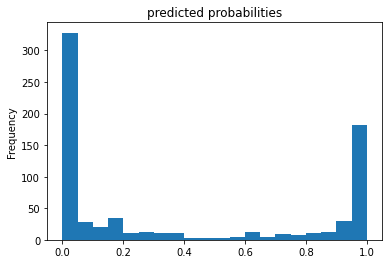

In [134]:
#grafico delle previsioni
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
clear_output()  # clears console output

probs.plot(kind='hist', bins=20, title='predicted probabilities')